## Stochastic Gradient Descent

To adjust the weights and biases using the derivatives gathered from back propagtion, Stochastic Gradient Descent will be used. Three hyperparemters will be used to ensure the global minimum will be reached: a learning rate, a learning rate decay and momentum.

In [13]:
# Import relavant modules
import numpy as np

# Import class objects for the neural network and spiral data
from layerdense import *
from costfunctions import *
from spiraldata import spiral_data

In [14]:
# SGD optimiser class
class Optimizer_SGD:
    # Initialise optimiser and set default params
    def __init__(self, learning_rate = 1.0, decay = 0.0, momentum = 0.0):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay 
        self.iterations = 0
        self.momentum = momentum
    
    # Call once before any parameter updates
    def pre_update_params(self):
        # If decay argument, apply decay to current learning rate calculations
        self.current_learning_rate = self.learning_rate * \
                                     (1.0 / (1.0 + self.decay * self.iterations))
    
    # Update parameters
    def update_params(self, layer):
        # If momentum was passed
        if self.momentum:
            # If layer output does not contain momentum arrays
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
                
                weight_updates = \
                                 self.momentum * layer.weight_momentums - \
                                 self.current_learning_rate * layer.dweights
                layer.weight_momentums = weight_updates
                
                # Update bias
                bias_updates = self.momentum * layer.bias_momentums - \
                               self.current_learning_rate * layer.dbiases
                layer.bias_momentums = bias_updates
                
                # If no momentum is used 
            else:
                weight_updates = -self.current_learning_rate * \
                                  layer.dweights
                bias_updates = -self.current_learning_rate * layer.dbiases
                
            # Update weights and biases
            layer.weights += weight_updates
            layer.biases += bias_updates
        
    # Call once after a params update
    def post_update_params(self):
        self.iterations += 1                    

Test the optimising function using the spiral data

In [21]:
# Create spiral data
X_train, y_train = spiral_data(100, 3)

# Initiate instances of NN classes. We need more neurons in the hidden layer to make it more accurate.
hidden_layer = LayerDense(2, 50)
ReLU = ActivationRelU()
output_layer = LayerDense(50, 3)
softmax_cost = ActivationSoftmaxCost()

# Create optimiser instance object
sgd = Optimizer_SGD(decay = 1e-3, momentum = 0.95)

# Train in epochs. 40001 iterations.
for epoch in range(65001):
    # Forward propagation
    hidden_layer.forward(X_train)
    ReLU.forward(hidden_layer.output)
    output_layer.forward(ReLU.output)
    
    # Calculate error
    cost = softmax_cost.forward(output_layer.output, y_train)
    
    # Calculate accuracy from output of softmax and y
    predictions = np.argmax(softmax_cost.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    # Print statistics per set of epochs
    if not epoch % 500:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {cost:.3f}, ' +
              f'lr: {sgd.current_learning_rate}')
        
    # Back propagation 
    softmax_cost.backward(softmax_cost.output, y_train)
    output_layer.backward(softmax_cost.dinputs)
    ReLU.backward(output_layer.dinputs)
    hidden_layer.backward(ReLU.dinputs)
    
    # Update weights and biases
    sgd.pre_update_params()
    sgd.update_params(hidden_layer)
    sgd.update_params(output_layer)
    sgd.post_update_params()

epoch: 0, acc: 0.380, loss: 1.099, lr: 1.0
epoch: 500, acc: 0.477, loss: 1.038, lr: 0.66711140760507
epoch: 1000, acc: 0.503, loss: 1.024, lr: 0.5002501250625312
epoch: 1500, acc: 0.510, loss: 1.000, lr: 0.4001600640256102
epoch: 2000, acc: 0.527, loss: 0.972, lr: 0.33344448149383127
epoch: 2500, acc: 0.490, loss: 0.969, lr: 0.2857959416976279
epoch: 3000, acc: 0.517, loss: 0.951, lr: 0.25006251562890724
epoch: 3500, acc: 0.553, loss: 0.934, lr: 0.22227161591464767
epoch: 4000, acc: 0.580, loss: 0.914, lr: 0.2000400080016003
epoch: 4500, acc: 0.577, loss: 0.898, lr: 0.18185124568103292
epoch: 5000, acc: 0.577, loss: 0.882, lr: 0.16669444907484582
epoch: 5500, acc: 0.590, loss: 0.866, lr: 0.15386982612709646
epoch: 6000, acc: 0.590, loss: 0.850, lr: 0.1428775539362766
epoch: 6500, acc: 0.610, loss: 0.834, lr: 0.13335111348179757
epoch: 7000, acc: 0.607, loss: 0.820, lr: 0.12501562695336915
epoch: 7500, acc: 0.627, loss: 0.803, lr: 0.11766090128250381
epoch: 8000, acc: 0.630, loss: 0.792

epoch: 65000, acc: 0.850, loss: 0.387, lr: 0.015151744723404902


The neural network achieved 90 % accuracy after 100000 epochs. To achieve a greater accuracy, further hyper parameters will need to be added such L1 and L2 regularisation. The neural network can be tested using new spiral data.

In [26]:
# Create test dataset
X_test, y_test = spiral_data(100, 3)

# Pass dataset through the neural network with updated final params
hidden_layer.forward(X_test)
ReLU.forward(hidden_layer.output)
output_layer.forward(ReLU.output)
cost = softmax_cost.forward(output_layer.output, y_test)

# Calculate accuracy and loss for the test dataset
predictions = np.argmax(softmax_cost.output, axis = 1)
# If y_test is one hot encoded, convert to scalar values
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis = 1)
accuracy = np.mean(predictions == y_test)

# Print statistics
print(f'test, acc: {accuracy:.3f}, loss: {cost:.3f}')


test, acc: 0.723, loss: 0.674


The validation dataset achieved 75% percent accuracy. This can be improved by increasing the number of samples in the training set, the number of neurons in the hidden layer or the amount of epochs during training.

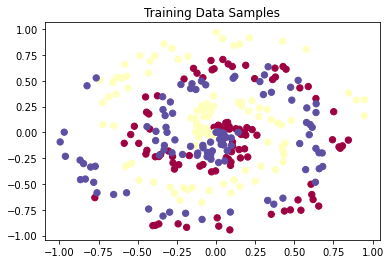

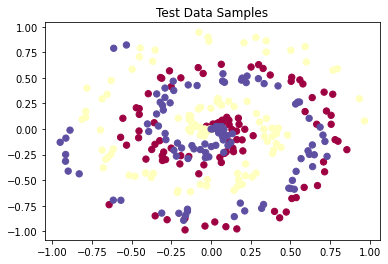

In [29]:
# Modules
import matplotlib.pyplot as plt

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.title("Training Data Samples")
plt.show()

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.title("Test Data Samples")
plt.show()

